In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

clear_output()

In [12]:
# 3
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)
test_image_generator = ImageDataGenerator(rescale=1./255)

train_data_gen = train_image_generator.flow_from_directory(
    directory=train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)
val_data_gen = train_image_generator.flow_from_directory(
    directory=validation_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=batch_size,
    class_mode='binary',
    seed=42
)
test_data_gen = train_image_generator.flow_from_directory(
    directory=PATH,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    color_mode='rgb',
    batch_size=batch_size,
    classes=['test'],
    shuffle=False,
    seed=42
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


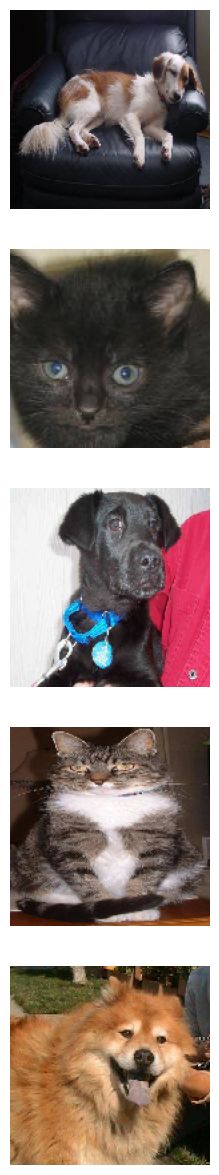

In [13]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5])


In [18]:
# 5
train_image_generator = ImageDataGenerator(rescale=1/255,
                                           rotation_range=45,
                                           height_shift_range=0.2,
                                           width_shift_range=0.2,
                                           shear_range=0.2,
                                           zoom_range=0.2,
                                           horizontal_flip=True,
                                           fill_mode='nearest')


Found 2000 images belonging to 2 classes.


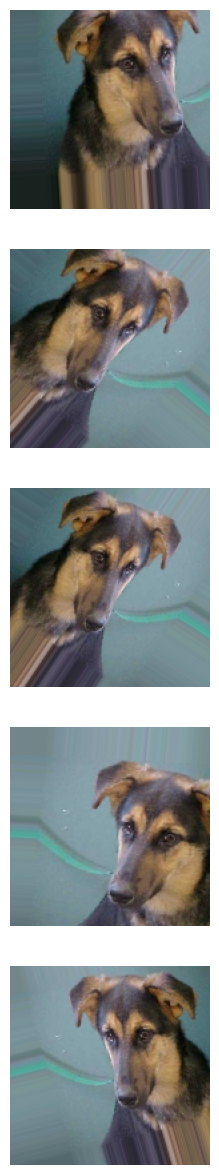

In [19]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [23]:
# 7
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(2,2),
    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Dropout(0,2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

model.compile(loss = 'binary_crossentropy',
              optimizer = tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [34]:
# 8
step_per_epoch = train_data_gen.n//train_data_gen.batch_size
validation_step = val_data_gen.n//train_data_gen.batch_size

callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    mode='auto',
    restore_best_weights=True,
)

history = model.fit(train_data_gen,
                    steps_per_epoch = step_per_epoch,
                    epochs = 100,
                    validation_data = val_data_gen,
                    validation_steps = validation_step,
                    callbacks=[callback]
                    )

Epoch 1/100
15/15 [==============================] - 15s 1s/step - loss: 0.6405 - accuracy: 0.6368 - val_loss: 0.6173 - val_accuracy: 0.6641
Epoch 2/100
15/15 [==============================] - 15s 1s/step - loss: 0.6210 - accuracy: 0.6474 - val_loss: 0.6062 - val_accuracy: 0.6674
Epoch 3/100
15/15 [==============================] - 15s 1s/step - loss: 0.6352 - accuracy: 0.6512 - val_loss: 0.6179 - val_accuracy: 0.6786
Epoch 4/100
15/15 [==============================] - 16s 1s/step - loss: 0.6157 - accuracy: 0.6480 - val_loss: 0.5924 - val_accuracy: 0.6574
Epoch 5/100
15/15 [==============================] - 15s 1s/step - loss: 0.5968 - accuracy: 0.6827 - val_loss: 0.5907 - val_accuracy: 0.6663
Epoch 6/100
15/15 [==============================] - 15s 1s/step - loss: 0.5841 - accuracy: 0.6806 - val_loss: 0.5715 - val_accuracy: 0.6942
Epoch 7/100
15/15 [==============================] - 15s 1s/step - loss: 0.5797 - accuracy: 0.6886 - val_loss: 0.5575 - val_accuracy: 0.6920
Epoch 8/100
1

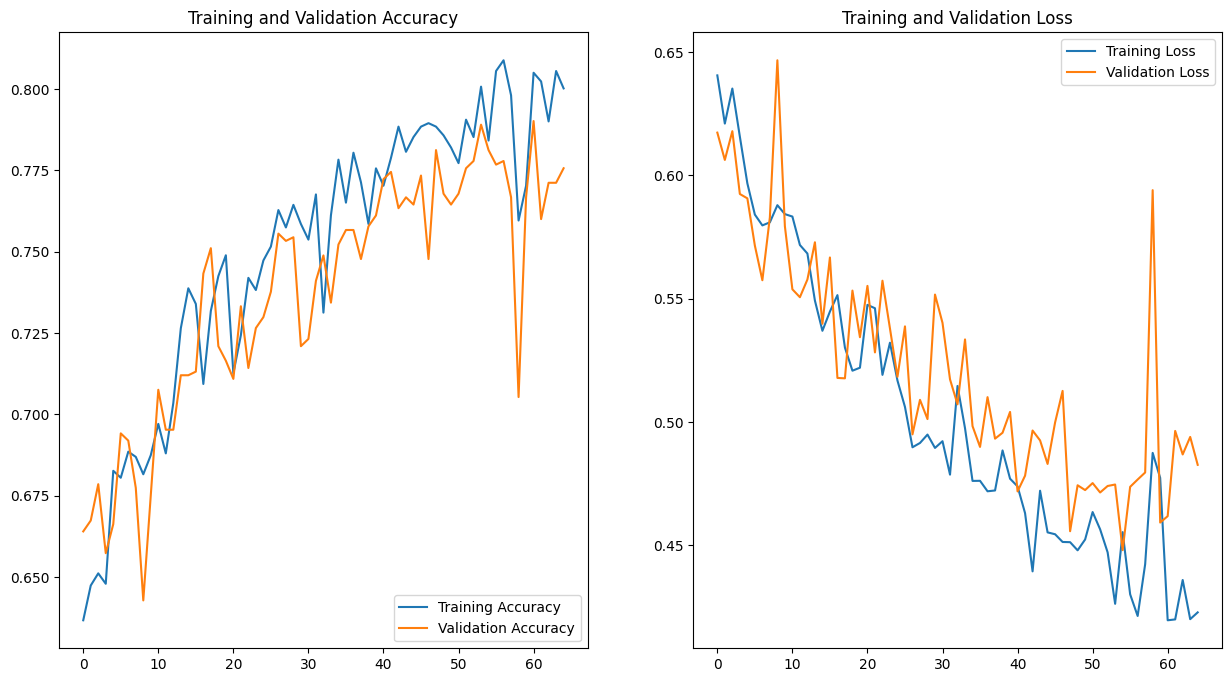

In [47]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(history.history['accuracy']))

plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# Predict

In [63]:
probs = model.predict(test_data_gen)
probs = probs.reshape(-1)
probs = probs.tolist()

1/1 [==============================] - 0s 103ms/step


In [67]:
print(probs)

[0.8107410073280334, 0.17637625336647034, 0.0044817738234996796, 0.9507118463516235, 0.3833160698413849, 0.5278698801994324, 0.511700451374054, 0.0867849588394165, 0.7833799719810486, 0.9772059917449951, 0.2666040062904358, 0.9129179120063782, 0.3059789538383484, 0.47515350580215454, 0.4399174749851227, 0.9092465043067932, 0.8316406011581421, 0.9304282665252686, 0.9202696084976196, 0.8839881420135498, 0.015314598567783833, 0.5288522839546204, 0.12442567944526672, 0.9191121459007263, 0.8468757271766663, 0.31875649094581604, 0.8468312621116638, 0.2841859757900238, 0.22063282132148743, 0.797296941280365, 0.24996432662010193, 0.07690203189849854, 0.9376099705696106, 0.9752091765403748, 0.034515250474214554, 0.5875376462936401, 0.9974557757377625, 0.9843734502792358, 0.6089310050010681, 0.1093321144580841, 0.32764512300491333, 0.10644969344139099, 0.9926920533180237, 0.8885248899459839, 0.02736154943704605, 0.12696623802185059, 0.7875946760177612, 0.03112129494547844, 0.3348982036113739, 0.

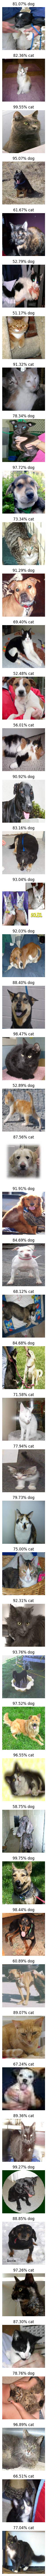

In [64]:
sample_testing_images, _ = next(test_data_gen)
plotImages(sample_testing_images, probs)

In [68]:
# 11
answers =  [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
            1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
            1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
            1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
            0, 0, 0, 0, 0, 0]

correct = 0

for probability, answer in zip(probabilities, answers):
  if round(probability) == answer:
    correct +=1

percentage_identified = (correct / len(answers)) * 100

passed_challenge = percentage_identified >= 63

print(f"Your model correctly identified {round(percentage_identified, 2)}% of the images of cats and dogs.")

if passed_challenge:
  print("You passed the challenge!")
else:
  print("You haven't passed yet. Your model should identify at least 63% of the images. Keep trying. You will get it!")

Your model correctly identified 80.0% of the images of cats and dogs.
You passed the challenge!
